### EDA

Corona Virus, and the impact of safety measure

Compare metropolitan covid cases and the effets of mandated safety measures (mask wearing, remote schooling, restaurant closures, etc.) 

In [1]:
# https://www.opendataphilly.org/dataset/covid-cases
#covid cases by DATE for philly zip codes. includes positive and negative cases

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Philadelphia: 21st highest population density in the US (with citys of 75,000 or more residents)...from 2010 census with listed population of 1,517,550, and 11,233.6 people living in every sqaure mile. The city parameters include 47 postal zip codes

https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population_density

https://www.phillyvoice.com/maps-how-does-phillys-population-density-compare-other-cities/




In [3]:
#update this to 2019 density with 2019 pop count 

In [4]:
philly = pd.read_csv('./covid_cases_by_date.csv')

In [5]:
philly.head()


,the_geom,the_geom_webmercator,collection_date,count,test_result,etl_timestamp
0,NaN,NaN,7/4/2020,47,positive,1/30/2021 18:20
1,NaN,NaN,11/5/2020,824,positive,1/30/2021 18:20
2,NaN,NaN,1/2/2021,4345,negative,1/30/2021 18:20
3,NaN,NaN,3/22/2020,84,positive,1/30/2021 18:20
4,NaN,NaN,8/6/2020,3611,negative,1/30/2021 18:20


In [6]:
#can remove geom columns, and data upload column

In [7]:
del philly['the_geom']

In [8]:
del philly['the_geom_webmercator']

In [9]:
del philly['etl_timestamp']

In [10]:
philly.head()

,collection_date,count,test_result
0,7/4/2020,47,positive
1,11/5/2020,824,positive
2,1/2/2021,4345,negative
3,3/22/2020,84,positive
4,8/6/2020,3611,negative


In [11]:
#sort by data

In [12]:
philly_sorted = philly.sort_values('collection_date')

In [13]:
philly_sorted

,collection_date,count,test_result
154,1/1/2021,4801,negative
319,1/1/2021,185,positive
393,1/10/2021,296,positive
67,1/10/2021,4401,negative
223,1/11/2021,729,positive
...,...,...,...
125,9/7/2020,2044,negative
248,9/8/2020,2770,negative
380,9/8/2020,95,positive
417,9/9/2020,3637,negative


In [14]:
#dates are sorting incorrectly, is pandas reading the "/" as a divisor??

In [15]:
type(philly_sorted['collection_date'])

pandas.core.series.Series

In [16]:
philly_sorted['collection_date'] = pd.to_datetime(philly_sorted.collection_date)

In [17]:
philly_sorted.head(2)

,collection_date,count,test_result
154,2021-01-01,4801,negative
319,2021-01-01,185,positive


In [18]:
ps =  philly_sorted.sort_values('collection_date', ascending = True)
ps

,collection_date,count,test_result
326,2020-03-05,9,negative
305,2020-03-07,6,negative
369,2020-03-08,9,negative
99,2020-03-10,20,negative
275,2020-03-11,6,positive
...,...,...,...
262,2021-01-27,234,positive
313,2021-01-27,4468,negative
595,2021-01-28,58,positive
360,2021-01-28,1992,negative


In [19]:
#now its showing correctly
#On 3/11/2020 they started keeping two counts per date: positives and negatives
#want to remove the 4 dates with just negatives

In [20]:
ps.drop([326 , 369 , 305 , 99] , inplace = True)


In [21]:
ps

,collection_date,count,test_result
275,2020-03-11,6,positive
429,2020-03-11,42,negative
557,2020-03-12,71,negative
526,2020-03-13,12,positive
456,2020-03-13,117,negative
...,...,...,...
262,2021-01-27,234,positive
313,2021-01-27,4468,negative
595,2021-01-28,58,positive
360,2021-01-28,1992,negative


In [22]:
ps.isnull().sum()

collection_date    0
count              0
test_result        0
dtype: int64

In [23]:
philly_final = ps.reset_index(drop=True)

In [24]:
philly_final

,collection_date,count,test_result
0,2020-03-11,6,positive
1,2020-03-11,42,negative
2,2020-03-12,71,negative
3,2020-03-13,12,positive
4,2020-03-13,117,negative
...,...,...,...
643,2021-01-27,234,positive
644,2021-01-27,4468,negative
645,2021-01-28,58,positive
646,2021-01-28,1992,negative


In [25]:
philly_final.groupby(['test_result']).mean()

,count
test_result,
negative,3693.387692
positive,337.399381


In [26]:
#So, in Philly the majority of test_results (and therefore testees) were negative

In [27]:
philly_final.groupby(['collection_date']).mean()

,count
collection_date,
2020-03-11,24.0
2020-03-12,71.0
2020-03-13,64.5
2020-03-14,60.5
2020-03-15,46.5
...,...
2021-01-25,3931.0
2021-01-26,3493.5
2021-01-27,2351.0


In [28]:
import seaborn as sns

In [29]:
philly_grouped = philly_final.groupby(['collection_date']).sum()
#want to look at the total tests administered per day, both positive and negative
#to see how the # of people getting tested per day increased over time
philly_grouped

,count
collection_date,
2020-03-11,48
2020-03-12,71
2020-03-13,129
2020-03-14,121
2020-03-15,93
...,...
2021-01-25,7862
2021-01-26,6987
2021-01-27,4702


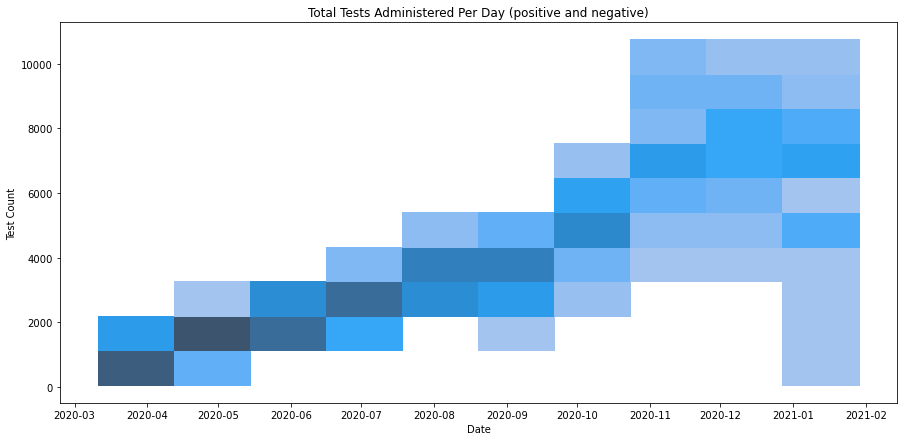

In [30]:
plt.figure(figsize=(15, 7))
sns.histplot(x = 'collection_date' , y =  'count' , data = philly_grouped).set( title = 'Total Tests Administered Per Day (positive and negative)' , ylabel = 'Test Count' , xlabel = 'Date');
                                                                        

In [31]:
#occurences of high-count testing dates (both + and - results) increased steadily over the 11-month perioud

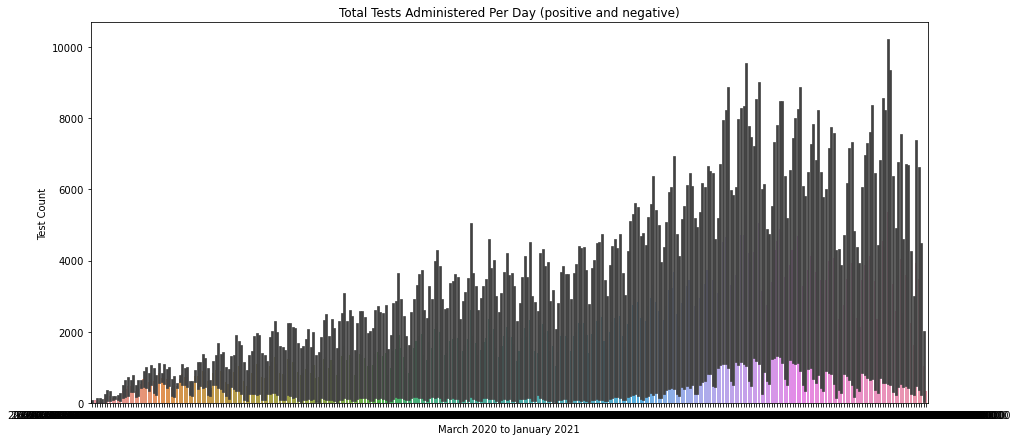

In [32]:
plt.figure(figsize=(15, 7))
sns.barplot(x = 'collection_date' , y =  'count' , data = philly_final).set( title = 'Total Tests Administered Per Day (positive and negative)' , ylabel = 'Test Count' , xlabel = 'March 2020 to January 2021');
                                                                        

In [33]:
philly_final[600:]
#seaborn is pretty incredible. Plot clearly shows the increase of test counts over time, also dilineates the + and - results over time
#with the use of color and non-colored bars

,collection_date,count,test_result
600,2021-01-05,6943,negative
601,2021-01-06,715,positive
602,2021-01-06,7263,negative
603,2021-01-07,668,positive
604,2021-01-07,7594,negative
605,2021-01-08,686,positive
606,2021-01-08,8333,negative
607,2021-01-09,6439,negative
608,2021-01-09,389,positive
609,2021-01-10,4401,negative


In [34]:
#now, I want to investigate three major safety precautions that the Philadelphia area undertook during the time frame

 https://www.inquirer.com/health/coronavirus/inq/coronavirus-cases-pennsylvania-philadelphia-nj-us-timeline-20200918.html

 https://www.phila.gov/media/20200628193437/Mask-Order-Signed-06-26-20.pdf

### General Timeline of first few months:



Jan 21, 2020: Federal health officials announce first case of coronavirus in Washington state.

March 6, 2020: First cases identified in Delaware County, PA

March 9, 2020: School is canceled for more than 30,000 students in the Philadelphia region

***March 16, 2020: Philadelphia stops all non-essential business, restaurants limited to takeout/ delivery*** 

March 22, 2020: Philadelphia major orders 'Stay at Home' order for non-essential travel

April 3, 2020: Schools officialy closed, limited to remote learning

***June 26, 2020: Entire state, including Philadelphia, adopts Face Covering legal requirement***

July 20, 2020: Gyms reopen

***September 8, 2020: Philadelphia Indoor dining reopens at 25% capacity***

Also, look at Thanksgiving (travel, state's guidance, etc.)


In [49]:
#Example 1:
#Look at indoor dining on September 8th... what effect, if any, did this have?
#Find, rate of increase per day during the 1 month period leading to Septmber 8th...and rate of increase 1-month period after

In [36]:
8*7*2
#about 112 rows

112

In [91]:
philly_final[301:425]
#I think I may need to change test_result... where 1 would equate to positive and 0 woudl equate to negative (this might make things easier
#later down the line)

,collection_date,count,test_result
301,2020-08-09,2916,negative
302,2020-08-09,75,positive
303,2020-08-10,3267,negative
304,2020-08-10,160,positive
305,2020-08-11,3461,negative
...,...,...,...
420,2020-10-07,5275,negative
421,2020-10-08,269,positive
422,2020-10-08,5593,negative
423,2020-10-09,220,positive


In [92]:
philly_final[301:425].groupby(['test_result', 'collection_date']).sum()

count
test_result collection_date       
negative    2020-08-09        2916
            2020-08-10        3267
            2020-08-11        3461
            2020-08-12        4588
            2020-08-13        3751
...                            ...
positive    2020-10-05         202
            2020-10-06         209
            2020-10-07         234
            2020-10-08         269
            2020-10-09         220

[124 rows x 1 columns]

### Clearly identify shortcomings, assumptions, and next steps.

I would like to very breifly compare the Philadelphia area to a city with similar population density, and also possibly to a city with much higher population density (San Fran, NY).

And if there is time, then compare Philadelphia to a city in a state that mandated fewer safety precaustions (or had safety
precautions, but did not make them legal requirements). 

Will keep this as apolitical, non-biased as possible

Assumption: Do I need to take into consideration average incubation period before people test positive/ show symptoms
    ---> Do I need to begin analysis n number of days after a safety protocal has been added or lifted?

***Shortcomings:***

There is PLENTY of data to go around for coronvirus testing, but I think figuring out exactly what to look at/ look for may be the problem.

Basically, which safety protocols are worthwile to investigate, and what is a good number to even look at?

Also, when I start looking into these other cities, will there data be formatted similarly or completely different (harder/ easier to  work with)?

Also, it would be really cool if the data was broken up by testing site (maybe it will be for other cities).
Could determine if certain testing sites saw higher percentage of positives.. but that could complicate things


